# User Guide to the new dm_simulator 

This notebook introduces to the user how to use dm_simulator as well as gives live demostrations of various options available to the user

### Installing the new version

In [1]:
pip install -e ../test_repo/ # replace the last option with the location of the downloaded file

Obtaining file:///home/biplab/Desktop/Work/Quantum_Simulator/Github/test_repo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: qiskit 0.10.1 has requirement qiskit_terra==0.8.0, but you'll have qiskit-terra 0.9.0 which is incompatible.
ERROR: qiskit-aqua 0.5.0 has requirement qiskit-terra<0.9,>=0.8.0, but you'll have qiskit-terra 0.9.0 which is incompatible.
  Found existing installation: qiskit-terra 0.9.0
    Uninstalling qiskit-terra-0.9.0:
      Successfully uninstalled qiskit-terra-0.9.0
  Running setup.py develop for qiskit-terra
Note: you may need to restart the kernel to use updated packages.


### Building a circuit

In [1]:
from qiskit import *

In [112]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.draw()

In [122]:
backend = BasicAer.get_backend('dm_simulator')
run = execute(qc,backend)
result = run.result()

In [118]:
result["results"][0]["data"]["coeffmatrix"]

array([0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.25, 0.25, 0.  , 0.  ])

In [119]:
result["results"][0]["data"]["densitymatrix"]

array([[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
       [0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])

### Different Intialization options

User can choose the initial density matrix from the following options
1. 'max_mixed'  
2. 'uniform_superpos'
3. 'thermal_state'
4. 'binary_string' 

If not given any option all qubits are initialised to zero state.

In [126]:
qc1 = QuantumCircuit(2)
backend = BasicAer.get_backend('dm_simulator')
options = {'custom_densitymatrix': 'uniform_superpos'}
run = execute(qc1,backend,**options)

In [128]:
result = run.result()
result["results"][0]["data"]

{'coeffmatrix': array([0.25, 0.25, 0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]),
 'densitymatrix': array([[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
        [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
        [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
        [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j]])}

## Different Measurment options

Projective measurement can be done in any basis. Along with that one can do simultaneous measurement on multiple qubits.

In [13]:
qc2 = QuantumCircuit(2,1)
qc2.cx(0,1)
qc2.measure(0,0,basis="N", add_param="[0.5,0,0.5]")
qc2.draw()

In [8]:
backend = BasicAer.get_backend('dm_simulator')
run = execute(qc2,backend)
result2 = run.result()
result2["results"][0]["data"]

{'counts': {'0x0': 1},
 'coeffmatrix': array([0.5, 0.5, 0. , 0. ]),
 'densitymatrix': array([[0.5+0.j, 0.5+0.j],
        [0.5+0.j, 0.5+0.j]])}

### Bell basis measurement 

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.measure(0,0, basis="Bell", add_param="01") # add_param represent the two qubits that are measured 
backend = BasicAer.get_backend("dm_simulator")
run = execute(qc,backend)
result = run.result()
result["results"][0]["data"]

{'counts': {'0x0': 1},
 'coeffmatrix': array([ 0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25]),
 'densitymatrix': array([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])}

### Ensemble Measurement

In [9]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q,c, basis="X") 
backend = BasicAer.get_backend("dm_simulator")
run = execute(qc,backend)
result = run.result()
result["results"][0]["data"]

{'counts': {'0x0': 1},
 'coeffmatrix': array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]),
 'densitymatrix': array([[2.500000e-01+0.j, 0.000000e+00+0.j, 3.061617e-17+0.j,
         0.000000e+00+0.j],
        [0.000000e+00+0.j, 2.500000e-01+0.j, 0.000000e+00+0.j,
         3.061617e-17+0.j],
        [3.061617e-17+0.j, 0.000000e+00+0.j, 2.500000e-01+0.j,
         0.000000e+00+0.j],
        [0.000000e+00+0.j, 3.061617e-17+0.j, 0.000000e+00+0.j,
         2.500000e-01+0.j]])}

### Expectation of a Pauli string

In [20]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q,c, basis="X") 
backend = BasicAer.get_backend("dm_simulator")
run = execute(qc,backend)
result = run.result()
result["results"][0]["data"]

{'counts': {'0x0': 1},
 'coeffmatrix': array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]),
 'densitymatrix': array([[2.500000e-01+0.j, 0.000000e+00+0.j, 3.061617e-17+0.j,
         0.000000e+00+0.j],
        [0.000000e+00+0.j, 2.500000e-01+0.j, 0.000000e+00+0.j,
         3.061617e-17+0.j],
        [3.061617e-17+0.j, 0.000000e+00+0.j, 2.500000e-01+0.j,
         0.000000e+00+0.j],
        [0.000000e+00+0.j, 3.061617e-17+0.j, 0.000000e+00+0.j,
         2.500000e-01+0.j]])}

## Noise Models

In [2]:
np.cos(0.3)

NameError: name 'np' is not defined

In [4]:
%matplotlib notebook
from qiskit import *
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
options = {"chop_threshold": 1e-15,
        "thermal_factor": 0.,
        "decoherence_factor": 1.,
        "depolarization_factor": 1.,
        "bell_depolarization_factor": 1.,
        "decay_factor": 1.,
        "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
        "tsp_model_error": [1., 0.]}
qc.x(q[0])
qc.h(q[2])
qc.cx(q[0],q[1])
qc.measure(q[0],c[0],basis='Bell',add_param='01') 
#qc.measure(q,c)
backend = BasicAer.get_backend("dm_simulator")
run = execute(qc,backend,**options)
result = run.result()
result["results"][0]["data"]

{'bell_probabilities01': {'Bell_1': 0.24999999999999997,
  'Bell_2': 0.24999999999999997,
  'Bell_3': 0.25,
  'Bell_4': 0.25},
 'reduced_bell_densitymatrix01': array([[ 2.5000000e-01,  2.5000000e-01,  0.0000000e+00,  1.5308085e-17],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.5000000e-01, -2.5000000e-01,  0.0000000e+00, -1.5308085e-17]]),
 'coeffmatrix': array([ 0.125,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        -0.125,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   , 

In [2]:
bell = result["results"][0]["data"]["reduced_bell_densitymatrix"]

KeyError: 'reduced_bell_densitymatrix'

In [3]:
bell.shape

NameError: name 'bell' is not defined

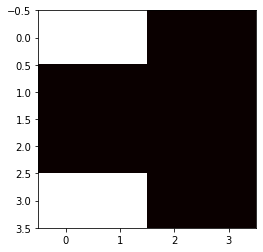

In [10]:
plt.imshow(bell,cmap='hot', interpolation='nearest')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


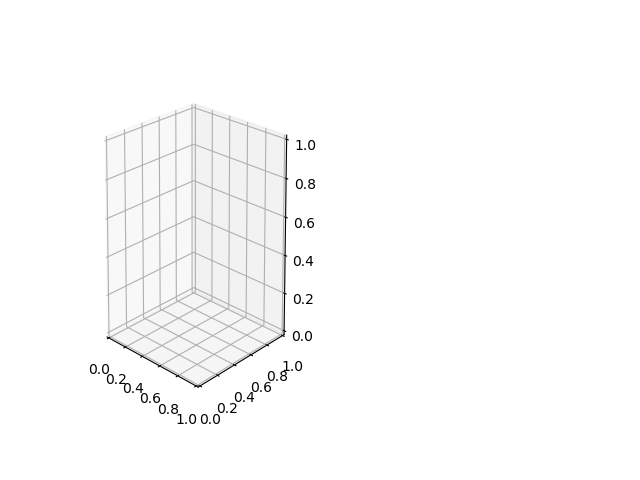

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
_x = np.arange(4)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

In [17]:
x,y

(array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]))

In [18]:
z = bell[x,y]

In [19]:
z

array([1.25000000e-01, 0.00000000e+00, 0.00000000e+00, 1.25000000e-01,
       1.25000000e-01, 0.00000000e+00, 0.00000000e+00, 1.25000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.65404249e-18, 0.00000000e+00, 0.00000000e+00, 7.65404249e-18])

In [20]:
zz = np.zeros_like(z)

In [21]:
zz

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
ax1.bar3d(x, y, zz,0.1,0.1,z, shade=True)

In [35]:
plt.show()

In [7]:
from matplotlib import cm

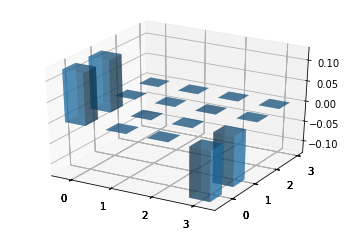

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

_x = range(4)
_y = range(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
top = bell[x,y]
bottom = np.zeros_like(top)
width = 0.5
depth = 0.5
ax.bar3d(x-0.25, y-0.5, bottom, width, depth, top, alpha=0.5,shade=True)

#ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
#ax2.set_title('Not Shaded')
#ax.set_xlim3d(0,4)
#ax.set_ylim3d(0,4)
ax.set_zlim3d(-0.125,0.125)
plt.rcParams['lines.linewidth'] = 1
ax.w_xaxis.set_ticks(x)
ax.w_yaxis.set_ticks(y)

plt.show()

In [76]:
x ,y

(array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]))